In [ ]:
!pip3 install spacy==2.3.5
!pip3 install nltk
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz
!pip3 install pyresparser
import spacy
import spacy.displacy as displacy
import nltk

     |████████████████████████████████| 10.4MB 5.1MB/s 
     |████████████████████████████████| 1.1MB 42.4MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.1MB 5.3MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-cp37-none-any.whl size=12047109 sha256=122f6a2fc9075a0a098bfa092e9c13d8bb77e63d645ef5967f6f157efb583138
  Stored in directory: /root/.cache/pip/wheels/2b/3f/41/f0b92863355c3ba34bb32b37d8a0c662959da0058202094f46
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
     |████████████████████████████████| 4.2MB 5.0MB/s 
     |████████████████████████████████| 153kB 40.7MB/s 
     |█████████████████████████████

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [ ]:
import gzip
import tarfile
import glob
import os
import sklearn
import numpy
import pandas as pd
from sklearn.utils import resample
import keras
!pip install keras_metrics
import keras_metrics
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Dense, Embedding
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import f1_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/CIS 530 Project/Milestone 3/train_data.csv').dropna().drop_duplicates()
val_data = pd.read_csv('/content/drive/MyDrive/CIS 530 Project/Milestone 3/val_data.csv').dropna().drop_duplicates()
test_data = pd.read_csv('/content/drive/MyDrive/CIS 530 Project/Milestone 3/test_data.csv').dropna().drop_duplicates()
datasets = [train_data, val_data, test_data]

In [ ]:
# Downsample non-controversial to balance classes
train_non_data = train_data[train_data['contro'] == 0]
train_con_data = train_data[train_data['contro'] == 1]
train_non_balanced = resample(train_non_data, replace=False, n_samples = len(train_con_data))
combined = pd.concat([train_con_data, train_non_balanced])
train_data = combined.sample(frac=1).reset_index(drop=True)
train_data = train_data.drop(columns=['Unnamed: 0'])

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(word):
  return lemmatizer.lemmatize(word)

words_to_ignore = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
def clean_str(s):
  tokenized_words = tokenizer.tokenize(s)
  tokenized_words = [word for word in tokenized_words if word not in words_to_ignore]
  tokenized_words = [lemmatize_word(word) for word in tokenized_words]
  return ' '.join(tokenized_words)

In [ ]:
for dataset in datasets:
  dataset['comment_text'] = dataset['comment_text'].apply(lambda text: clean_str(text))

In [ ]:
# samples of non-controversial and controversial text
non_controversial_text = train_data[train_data['contro'] == 0].head(10)['comment_text'].tolist()
controversial_text = train_data[train_data['contro'] == 1].head(10)['comment_text'].tolist()

In [ ]:
for text in enumerate(non_controversial_text):
  print(text)

non_controversial_ner_list = []
for text in non_controversial_text:
  word_tag_list = []
  for e in nlp(text).ents:
    word_tag_list.append((e.text, e.label_))
  non_controversial_ner_list.append(word_tag_list)

non_controversial_ner_list



(0, '"\n\nCharles, I\'m afraid that doesn\'t answer my point, at all. It is absolutely a question of ""how to improve the associated article"" to query whether somebody describing the subject as ""a little tyke"" should be allowed to continue to comment. It\'s not about criticising that person on a personal level but whether they are damaging the article. That\'s my whole point. I totally understand your motives, which are totally decent, but I think you\'ve got the wrong end of the stick here."')
(1, 'Please remember that i am a human being, before')
(2, 'Arginase_1#Role in sexual response  If all aspects of NO biology were covered in this article, it would become unreadable. The specific applications of an enzyme should be discussed in the appropriate article Erection, if essential for the mechanism-of-action. Indeed, the discussion of NO there is like a footnote.')
(3, '"\n\nI was merely pointing out that after numerous arbitrators had warned you to not accuse editors of pedophilia 

[[('stick', 'FAC')],
 [],
 [],
 [('pedophilia onwiki', 'ORG'), ('first', 'ORDINAL')],
 [('the Vast Edit Wars', 'LAW')],
 [('WikiProject', 'ORG'),
  ('Chili', 'GPE'),
  ('January 2008', 'DATE'),
  ('2', 'CARDINAL'),
  ('1', 'CARDINAL'),
  ("'Under the Bridge'", 'WORK_OF_ART'),
  ('Anthony Kiedis', 'PERSON'),
  ('WikiProject', 'ORG'),
  ('Newsletter', 'PRODUCT'),
  ('Tuesday, January 1, 2008', 'DATE'),
  ('Red Hot', 'PERSON'),
  ('Chili', 'GPE'),
  ('One', 'CARDINAL'),
  ('Hot Minute', 'PERSON'),
  ('Good and Featured', 'ORG'),
  ('Niandra Lades and Usually', 'ORG'),
  ('October', 'DATE'),
  ('WikiProject', 'ORG')],
 [('1 October 2010', 'DATE'),
  ('Off2riorob', 'ORG'),
  ('two cents', 'MONEY'),
  ('23:35', 'TIME')],
 [('Hanover 4', 'ORG'), ('only 2', 'CARDINAL'), ('Hargreavesfan', 'NORP')],
 [],
 []]

In [ ]:
for text in enumerate(controversial_text):
  print(text)

controversial_ner_list = []
for text in controversial_text:
  word_tag_list = []
  for e in nlp(text).ents:
    word_tag_list.append((e.text, e.label_))
  controversial_ner_list.append(word_tag_list)

controversial_ner_list

(0, 'stupid prostitutes THANK YOU!')
(1, '"\n\n Oh and as far as ""not in line at all with how things are done"", that\'s pure horse shit and you know it. Disambiguation pages are a dime a dozen, and since you are so hell-bent on insisting that folklore and fiction are completely separate, we might as well turn Vampire into a disambig page and let you have your own little playground to fuck up. "')
(2, "(UTC)\nOne of them reminded me of Paris Hilton +20 IQ pointsno insult to the latter, I'm still wondering if it was her shtick to play the dumb blond. The other reminds me of Madonna. Both have big titsand that ain't particularly sexist as it's referred to in the show. As for Huffington, she's a very intelligent woman who got a very handsome divorce settlement, before leaving the GOP.24.36.54.238  00:25, 4 June 2015")
(3, 'How about you learn how to read and write during that time Jamie? Continue or continued you dumbass.\n\nSecond of all you ruined what I wrote you idiot')
(4, 'A jew go

[[],
 [('dozen', 'CARDINAL')],
 [('One', 'CARDINAL'),
  ('Paris Hilton +20', 'ORG'),
  ('Madonna', 'PERSON'),
  ('Huffington', 'PERSON'),
  ('00:25', 'TIME')],
 [('Jamie', 'PERSON'), ('Second', 'ORDINAL')],
 [('Arabs', 'NORP'), ('FUCK', 'ORG')],
 [],
 [('3234434aAa', 'CARDINAL')],
 [],
 [],
 []]

In [ ]:
non_controversial = train_data[train_data['contro'] == 0][['comment_text']].head(500)
controversial = train_data[train_data['contro'] == 1][['comment_text']].head(500)

In [ ]:
def get_named_entities(text):
  return [e.label_ for e in nlp(text).ents]

non_controversial['named_entities'] = non_controversial['comment_text'].apply(lambda text: get_named_entities(text))
controversial['named_entities'] = controversial['comment_text'].apply(lambda text: get_named_entities(text))

In [ ]:
nc_entities = non_controversial['named_entities'].tolist()
c_entities = controversial['named_entities'].tolist()

from collections import defaultdict

nc_entities_dist = defaultdict( int )
c_entities_dist = defaultdict( int )

for l in nc_entities:
  for entity in l:
    nc_entities_dist[entity] += 1

for l in c_entities:
  for entity in l:
    c_entities_dist[entity] += 1

nc_entities_dist = dict(nc_entities_dist)
c_entities_dist = dict(c_entities_dist)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

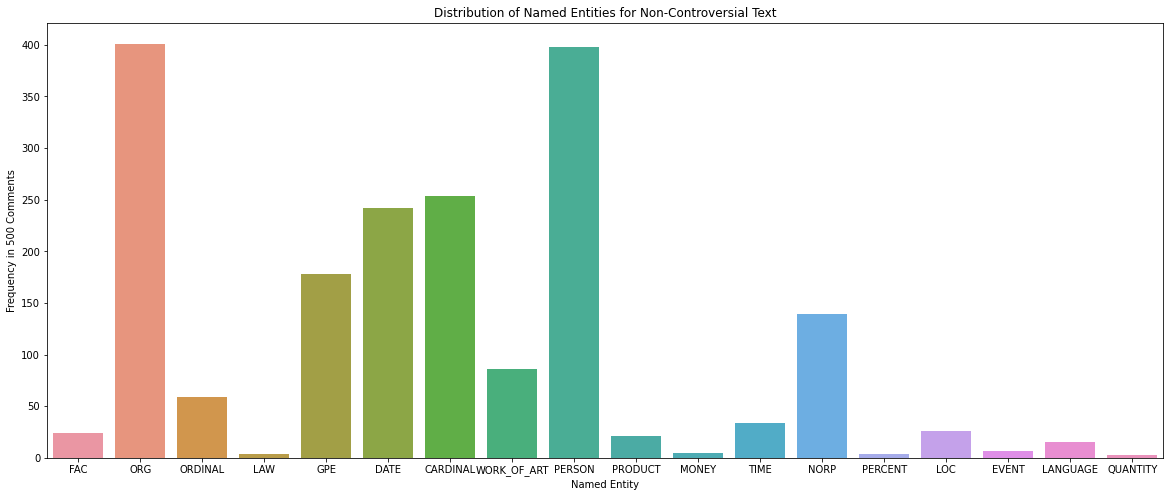

In [ ]:
nc_entity_names = list(nc_entities_dist.keys())
nc_entity_freqs = [float(nc_entities_dist[e]) for e in nc_entity_names]
plt.figure(figsize=(20, 8))
plt.title('Distribution of Named Entities for Non-Controversial Text')
plt.xlabel('Named Entity')
plt.ylabel('Frequency in 500 Comments')
sns.barplot(x=nc_entity_names, y=nc_entity_freqs)

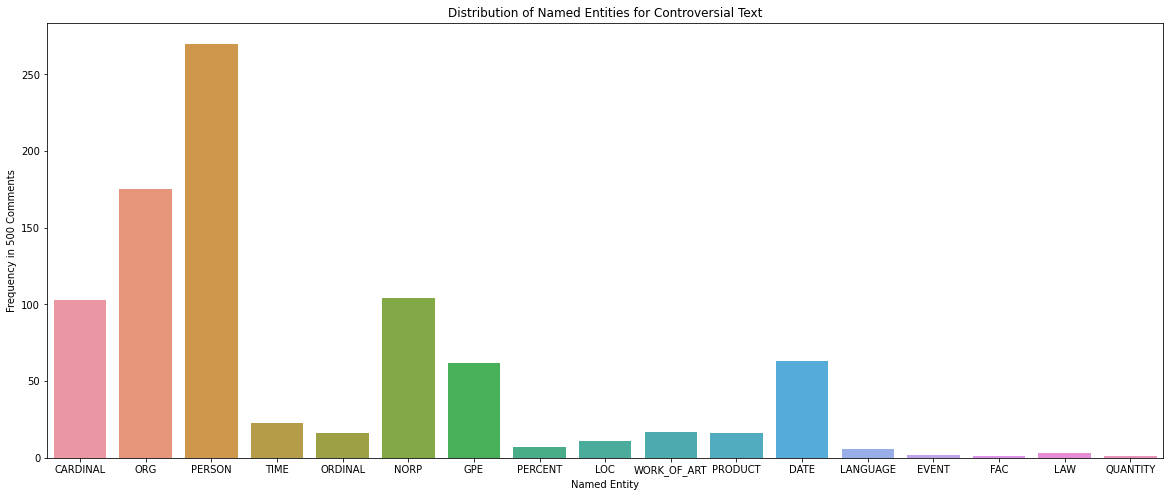

In [ ]:
c_entity_names = list(c_entities_dist.keys())
c_entity_freqs = [float(c_entities_dist[e]) for e in c_entity_names]
plt.figure(figsize=(20, 8))
plt.title('Distribution of Named Entities for Controversial Text')
plt.xlabel('Named Entity')
plt.ylabel('Frequency in 500 Comments')
sns.barplot(x=c_entity_names, y=c_entity_freqs)

In [ ]:
# top 10 words in controversial versus non-controversial text
non_controversial_comments = train_data[train_data['contro'] == 0][['comment_text']].head(500)['comment_text'].tolist()
controversial_comments = train_data[train_data['contro'] == 1][['comment_text']].head(500)['comment_text'].tolist()

In [ ]:
nc_dict = {}
c_dict = {}

for comment in non_controversial_comments:
  for word in comment.split(' '):
    if word not in nc_dict:
      nc_dict.update({word: 1})
    else:
      nc_dict.update({word: nc_dict.get(word) + 1})

for comment in controversial_comments:
  for word in comment.split(' '):
    if word not in c_dict:
      c_dict.update({word: 1})
    else:
      c_dict.update({word: c_dict.get(word) + 1})

In [ ]:
# remove stopwords and some manual cleaning
filtered_nc = {k:v for k,v in nc_dict.items() if k not in set(stopwords.words('english')) and k not in ['', '"', 'The', 'If', '-', 'I', 'like', 'You', 'A', 'IS'] and v >= 58}
filtered_nc = {k:v for k,v in sorted(filtered_nc.items(), key=lambda item: item[1], reverse=True)}

filtered_c = {k:v for k,v in c_dict.items() if k not in set(stopwords.words('english')) and k not in ['', 'I', 'like', 'You', 'A', 'IS', 'is.', 'Do'] and v >= 41}
filtered_c = {k:v for k,v in sorted(filtered_c.items(), key=lambda item: item[1], reverse=True)}

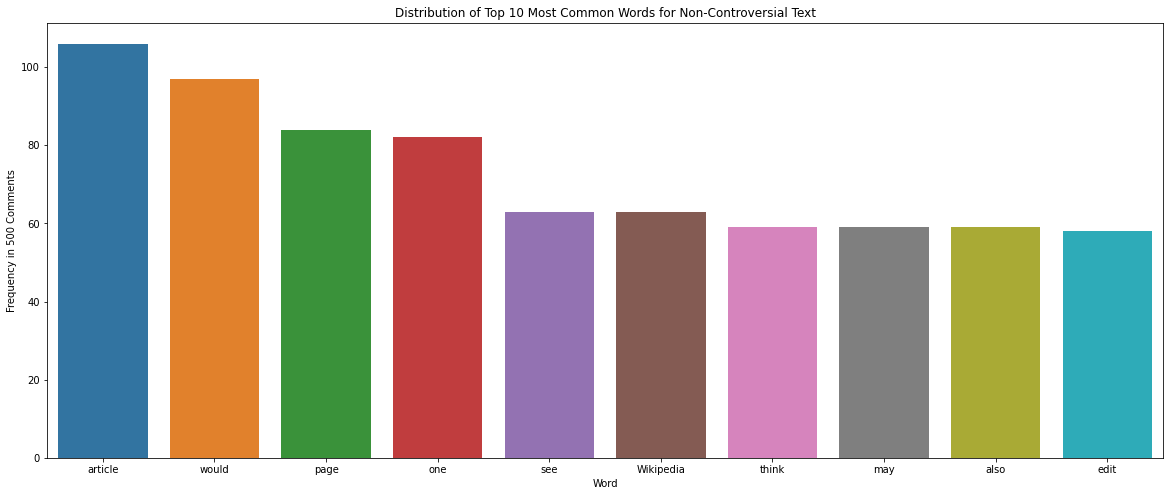

In [ ]:
nc_top_words = list(filtered_nc.keys())
nc_word_freqs = [float(filtered_nc[e]) for e in filtered_nc]
plt.figure(figsize=(20, 8))
plt.title('Distribution of Top 10 Most Common Words for Non-Controversial Text')
plt.xlabel('Word')
plt.ylabel('Frequency in 500 Comments')
sns.barplot(x=nc_top_words, y=nc_word_freqs)

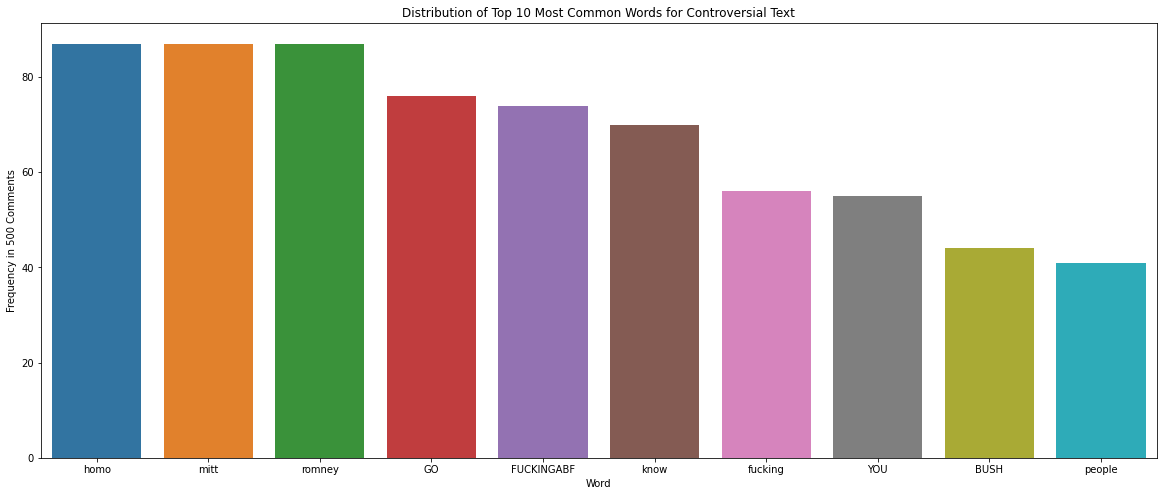

In [ ]:
c_top_words = list(filtered_c.keys())
c_word_freqs = [float(filtered_c[e]) for e in filtered_c]
plt.figure(figsize=(20, 8))
plt.title('Distribution of Top 10 Most Common Words for Controversial Text')
plt.xlabel('Word')
plt.ylabel('Frequency in 500 Comments')
sns.barplot(x=c_top_words, y=c_word_freqs)